# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    temp = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    temp.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
#Reviewer comment: Try to describe the samples in terms of how their category spending relates to the overall category 
#spending stats in data.describe(). You don't need to create another dataframe temp to do this, just compare the samples' 
#category spending to the means and/or medians of the product categorie my question to reviewer is that well 
#you can look at percentile for sample data points but you can't get idea about whole dataset, with total you can do that.

# I don't agree with the reviewer comment as it will complicate the initail analysis, 'Total' stats gives us 
#clean and easy way to understand the objective function so I will stick with temp.


# Display a description of the dataset
display(data.describe())

#Choosing a temp variable just to get the 'total' of each individual customers

temp['total'] = temp.sum(axis=1)

display(temp.describe())

print temp[:10]
#display(temp.describe())

#Look at the stats for 'total' column it suggests us the individual spending profile
# if we catagoried this in groups these are some groups appears
#Group 1 (G1) Data points near quartile 25% 17448
#Group 2 (G2) data points near quartile 50% 27492
#Group 3 (G3) data points near quartile 75% 41307
#Group 4 (G4) data points near min 904
#Group 5 (G5) data points near max 199891
#Group 6 (G6) data points near mean 33226

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  total
0  12669   9656     7561     214              2674          1338  34112
1   7057   9810     9568    1762              3293          1776  33266
2   6353   8808     7684    2405              3516          7844  36610
3  13265   1196     4221    6404               507          1788  27381
4  22615   5410     7198    3915              1777          5185  46100
5   9413   8259     5126     666              1795          1451  26710
6  12126   3199     6975     480              3140           545  26465
7   7579   4956     9426    1669              3321          2566  29517
8   5963   3648     6192     425              1716           750  18694
9   6006  11093    18881    1159              7425          2098  46662


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = []

indices.append(92)
indices.append(200)
indices.append(150)

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# Create a DataFrame of the chosen samples
samples1 = pd.DataFrame(temp.loc[indices], columns = temp.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset with totals:"
display(samples1)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9198,27472,32034,3232,18906,5130
1,3067,13240,23127,3941,9959,731
2,16225,1825,1765,853,170,1067


Chosen samples of wholesale customers dataset with totals:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,9198,27472,32034,3232,18906,5130,95972
1,3067,13240,23127,3941,9959,731,54065
2,16225,1825,1765,853,170,1067,21905


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

The data in question is the yearly suppy of products for each customers. From descriptive stats we can see:

From despriptive stat for field 'total' we can see 6 clear groups (G1, G2, G3, G4, G5 and G6). Please see my comments earier on the groups.

Please note (Q stands for quartile and G stands for groups), also remember from descritive stats that the average total spending of customers is 33226.

G1 ( for field 'total' Q 25% is 17448) --> Represent very low yearly total expenditure, probably small caffe or resturant spending less than total average.

G2 (for field 'total' Q 50% is 27492)  --> In between of Q 25% and Q 50% but still spending less than 'total' average

G3 (for field 'total' Q 75% is 41307) --> Represent high yearly expenditure, pobably big caffe chains, resutant chaines, retailers, markets, spending above average

G4 (for field 'total near minimum 904) --> Data points near the minimum, these are not year long consistent buyers it suggest they might be getting their stuff from others or they are really small buyers, this group must pay attention as this present the opportunity to grow business in this group.

G5 (for field 'total' near maximum 199891) ---> These data points indicates the biggest customers as well as biggest enterprises like big retailers chains.

G6 (for field 'total' near Mean 33226) --> The data points near the average and we can consider these as the year long medium buyer and also suggest medium size customers.

As per this explanation

0 represents in G5 maximum category and this might be big enterprises like big retailers chains or large resturant chain
1 represents in G3 big caffe, retailer or resturant
2 represents in G1, low expenditure, probably small caffe or resturant

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

target_cols = data.columns[-2] 
print target_cols
y = data[target_cols]

new_data = data.copy(deep=True)

# Removing Milk as it is most correlated with others, it might turns out to be good target 

new_data.drop(['Detergents_Paper'], axis = 1, inplace = True)

X = new_data

seed = 7
t_size = 0.25


# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
  test_size=t_size, random_state=seed)
                                                                     

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = seed)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
predictions = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print score

Detergents_Paper
0.695256147197


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

Review code note:
You should also set a random seed with your DecisionTreeRegressor()
    Shekhar:I guess I have already set a random seed in the cross validation which whould effect the DecisionTreeRegressor()
We can also more easily get the score with regressor.score(X_test, y_test)
    Shekhar: Agreed and implemented
    
 
I would like to answer this in 2 parts
1) I tried to all 6 variables as a target, here is the r2 score I got
Milk as a target = -2.3
Fresh as a target = -0.45
Grocery as a target = 0.53
Frozen as a target = -1.14
Detergents_Paper as a target = 0.69
Delicatessenas as a target = -1.99

I agree with review comments Detergents_Paper and Grocery can be predicted from other feature(high correlation), these features would actually not be good for identifying customers' spending habits, as when a customer purchases one of these they also purchase another, therefore not good for identifying customers' spending habits.

2) I created another column named'total' which is the sum of all products for individual customers and when I tried to predict total it gave the r2 score of 0.83 and shows it able to predict data much better that individual variables
The implemenation of Total can be seen in another notebook (attached), if you have a time then please have a look

Overall I feel the column 'Total' is much better predictor of the spending habits of customers

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

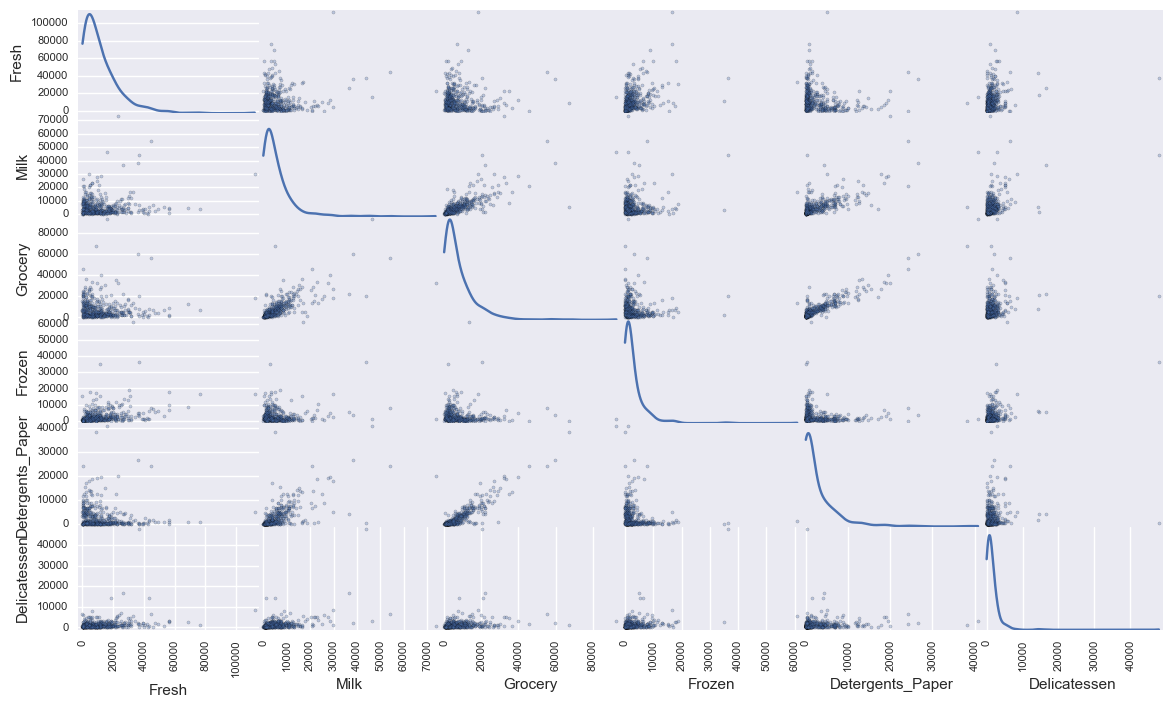

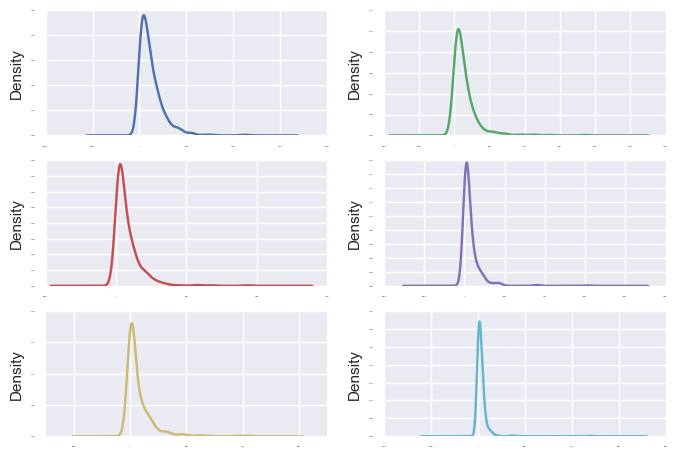

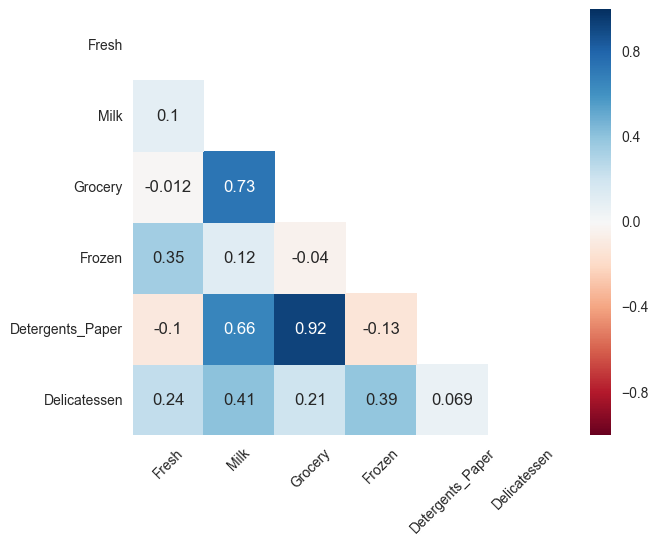

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# density
data.plot(kind='density', subplots=True, layout=(3,2), sharex=False, legend=False,
fontsize= 1)
plt.show()

import matplotlib.pyplot as plt
names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' ,'Delicatessen' ]

# correlation

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')
    plt.xticks(rotation=45, ha='center');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

Are there any pairs of features which exhibit some degree of correlation?
- If you look at the pearson co-relation matrix and plot
Milk is correlated with Grocery (0.73) and Detergents_Paper(0.66)
Grocery is highly correlated with Detergents_Paper (0.92)

Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?
Out of these Milk (r2 score = -2.3) is not a good predictor but Grocery (r2 score = 0.53) is better predictor target.
Also you can see that Detergents_Paper(r2 score = 0.69) is best correlated with Milk and Grocery with other so it is the best predictor as a target

How is the data for those features distributed?
From the density plot we can see that all 6 features are not normally distributed, they are positively skewed. Probably it need normalization

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

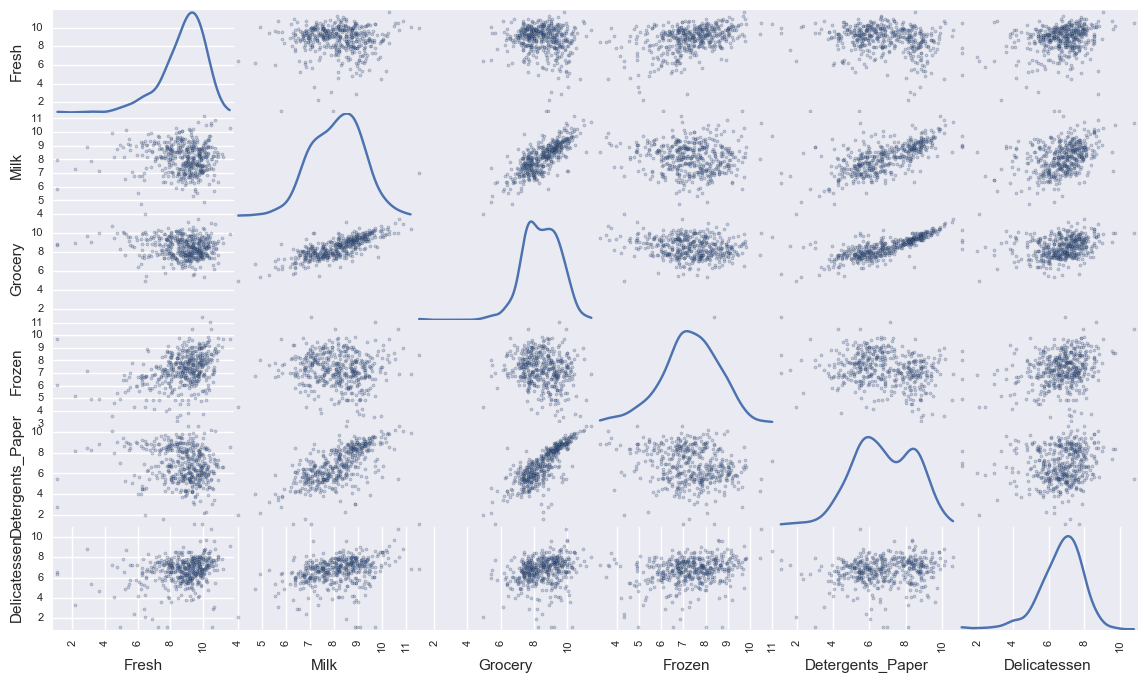

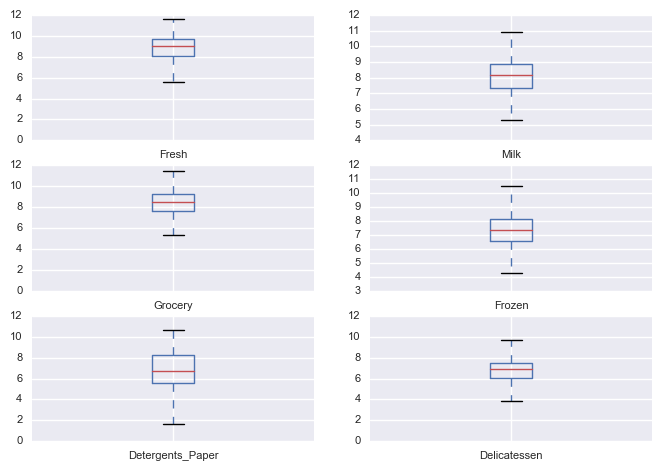

In [6]:
# TODO: Scale the data using the natural logarithm

log_data = np.log(data) 

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#reviewer suggested to use log_data.boxplot(); but it didn't work well so I keeping my original.

# box and whisker plots
log_data.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,
fontsize=8)
plt.show()

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.126741,10.220923,10.374553,8.080856,9.847235,8.542861
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.694309,7.509335,7.475906,6.748760,5.135798,6.972606


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
# I must say this idea is good from reviewer, I now throughly understand the counters assignments using index.

from scipy import stats
from  more_itertools import unique_everseen

# Keep outlier indices in a list and examine after looping thru the features
idx = []


# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Gather the indexes of all the outliers
    idx += log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()

print(sorted(idx))
 
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

#outliers = list(unique_everseen(idx))

import collections

outliers = [item for item, count in collections.Counter(idx).items() if count > 1]


print(sorted(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


print(log_data.shape)
print(good_data.shape)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]
[65, 66, 75, 128, 154]
(440, 6)
(435, 6)


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

    Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset

An outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.

Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution. In the former case one wishes to discard them or use statistics that are robust to outliers, while in the latter case they indicate that the distribution has high skewness and that one should be very cautious in using tools or intuitions that assume a normal distribution. A frequent cause of outliers is a mixture of two distributions, which may be two distinct sub-populations, or may indicate 'correct trial' versus 'measurement error'; this is modeled by a mixture model.

- Also as per the box plot (above) and method IQR shows there are many outliers 
As per IQR 
Find the inter quartile range, which is IQR = Q3 - Q1, where Q3 is the third quartile and Q1 is the first quartile. Then find these two numbers: a) Q1 - 1.5*IQR b) Q3 + 1.5*IQR The point is an outlier if < a or > b

    If any data points were added to the outliers list to be removed, explain why.

We can see that with this method 1/2 of the points are considered as outliers and I don't like to remove so many data points so I have implemented another method Z score (based on standard deviation), I have considered the data outside the 2sigma as outliers  this will remove 62 outlier points from dataset.

we have to sometime careful as Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

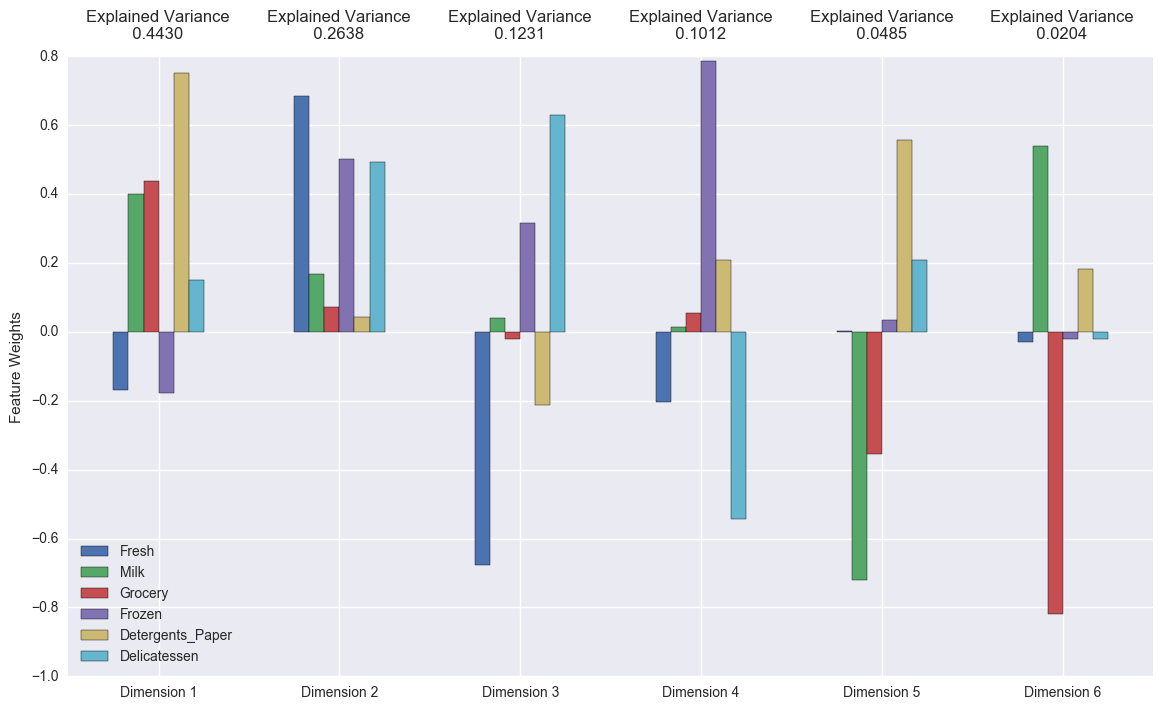

In [9]:
from sklearn.decomposition import PCA


# TODO: Apply PCA to the good data with the same number of dimensions as features

pca = PCA(n_components=6).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)
#pca.fit(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

# cumulative explaned variance
#print '\n', np.cumsum(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

    How much variance in the data is explained in total by the first and second principal component?  What about the first four principal components
With first it is 0.44
with second it is 0.26
After that explained variance is declining sharply from 0.1 (3rd) to 0.02 (6th)

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. Usally the number of principal components is less than or equal to the number of original variables. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible, we can see that in our case the first component is explaining 0.44), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. The principal components are orthogonal because they are the eigenvectors of the covariance matrix, which is symmetric. 


    Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.

PCA orders its output in terms of explained variance, i.e. the fraction of variance in the data explained by the relationships encoded in each principal component. So we know that the first pricipal component explains more of the variance than any other, the second component more than any other but the first and so on down the line. In our example, the first two principal components account for 44.0% and 26.0% of the variance in the data respectively. In contrast, the third principal component accounts for only 12.0% of the variance. It is clear from the plot above that the explained variance drops off rapidly after the first two components

        Another important point to note Interpretation of the principal components is based on finding which variables are most strongly correlated with each component, i.e., which of these numbers are large in magnitude, the farthest from zero in either positive or negative direction. Which numbers we consider to be large or small is of course is a subjective decision. You need to determine at what level the correlation value will be of importance. Here a correlation value above 0.5 is deemed important

The first principal component dimension has a coefficient of +0.78 for the 'Detergents_Paper' feature, +0.42 for the 'grocery' feature and so on. It's pretty obvious that the first principal component is predominantly the 'Detergents_Paper' followed by grocery and Milk feature. It explained the variance of about 44%

The second principal component dimension has a coefficient of +0.70 for the 'Fresh' feature' +0.50 for Frozen and 'Delicatessen' feature and so on. Second principal component is predominantly the 'Fresh', Frozen and  'Delicatessen'. It explained the variance of about 26%

The third principal component dimension has a coefficient of +0.65 for the 'Delicatessen' feature and -0.65 for the 'Fresh' feature and so on. It's pretty obvious that the third principal component is predominantly the 'Delicatessen'. It explained the variance of about 12%

The fourth principal component dimension has a coefficient of +0.80 for the 'Frozen' feature and -0.58 for Delicatessen . It's pretty obvious that the fourth principal component is predominantly the 'Frozen'. It explained the variance of about 10%

    Also we can note that the cumulative sum of explained variance, with the help of first 2 components we are able to explain 70% of variance and with the first 4 components 93% of the variance.

based on these 4 principal components Detergents_Paper, Fresh and Delicatessen most positively correlated features and frozen is negatively coorelated.

In first principal component Milk, Grocery, Detergents_Paper and Delicatessen are positiviely corelated, it means if somebody buys Detergents_Paper it strongly suggests that they also buy Milk and Grocery but they might not buy frozen and fresh since frozen and fresh is negatively corelated. We can make this kind of inference in other components as well.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,4.0512,2.1537,0.5577,0.2903,-0.0713,0.0530
1,2.9903,0.3645,0.2521,1.5653,-0.1922,-0.1244
2,-1.9406,0.2418,-0.2884,-1.2041,-0.0917,0.1492


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [11]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
print reduced_data[:10]

,Dimension 1,Dimension 2
0,4.0512,2.1537
1,2.9903,0.3645
2,-1.9406,0.2418


   Dimension 1  Dimension 2
0     1.757983    -0.009711
1     1.788665     0.812251
2     1.883353     1.599135
3    -1.155265     1.405201
4     0.784786     2.394294
5     1.085043     0.324315
6     1.128640    -0.262863
7     1.567236     0.901014
8     0.863567    -0.664968
9     2.873382     0.677438


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

    What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm?
K Means clustering* is a quick and conceptually straightforward algorithm for clustering data. It works well when the data clusters are relatively simple in shape, like Gaussian hyperspheres, but can struggle to identify clusters properly when the clusters have more complex non-linear geometries.

Gaussian Mixture Models* is an generalization of K Means clustering that takes into account the covariance of the data. It os very fast, and it does not presume the data has a specific structure that may in fact not be applicable.
(*From http://scikit-learn.org/stable/modules/)

Now, lets imagine some unclustered data. K-means/Mixture of Gaussians tries to break them into clusters.
Let's says we are aiming to break them into three clusters. K means will start with the assumption that a given data point belongs to one cluster. 
Choose a data point. At a given point in the algorithm, we are certain that a point belongs to a cluster 1. In the next iteration, we might revise that belief, and be certain that it belongs to the cluster 2. However, remember, in each iteration, we are absolutely certain as to which cluster the point belongs to. This is the "hard assignment".

What if we are uncertain? What if we think, well, I can't be sure, but there is 70% chance it belongs to the cluster 1, but also 10% chance its in Cluster 2, 20% chance it might be Cluster 3. That's a soft assignment. The Mixture of Gaussian model helps us to express this uncertainty. It starts with some prior belief about how certain we are about each point's cluster assignments. As it goes on, it revises those beliefs. But it incorporates the degree of uncertainty we have about our assignment.

    Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?
I have manually checked both the algos in our dataset against silhouette_score and it came out K-means is performing better than GMM. 
K-means is an effective algo. to extract a given number of clusters from a training set and in our case it is doing better than GMM clustering.

GMM clustering is more flexible but need not to be the more accurate than K-means because you can view it as a fuzzy or soft clustering method. Soft clustering methods assign a score to a data point for each cluster. The value of the score indicates the association strength of the data point to the cluster. As opposed to hard clustering methods, soft clustering methods are flexible in that they can assign a data point to more than one cluster. When clustering with GMMs, the score is the posterior probability. For an example of soft clustering using GMM.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

7 clusters: 0.36313
6 clusters: 0.36104
5 clusters: 0.35221
4 clusters: 0.3339
3 clusters: 0.39689
2 clusters: 0.42628


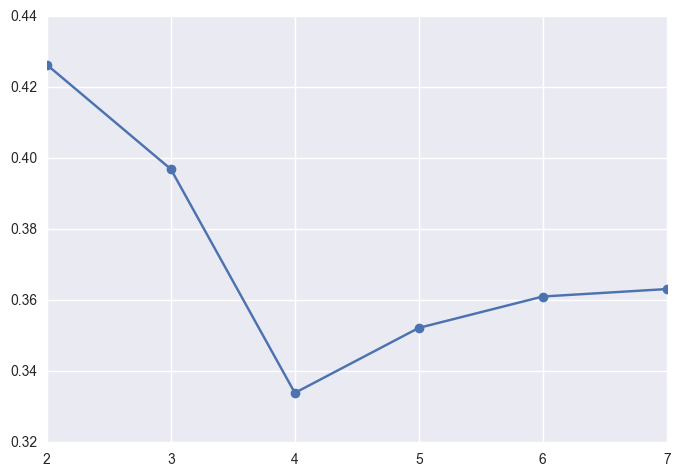

In [13]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#keep the scores for each cluster size
sil_scores = []

random_state = 7

for i in range(7,1,-1):
    clusterer = KMeans(i, random_state=random_state).fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    sil_scores.append(score)
    print i, 'clusters:', score.round(5)

# plot the scores
import matplotlib.pyplot as plt
_ = plt.plot(np.arange(7,1,-1), sil_scores, '-o')

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object lies within its cluster. 

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette score (SS) comes out to be
7 clusters: 0.35491
6 clusters: 0.36365
5 clusters: 0.35319
4 clusters: 0.33115
3 clusters: 0.36399
2 clusters: 0.44716

The best silhouette score is for 2 clusters whihc is obvious as seperating any data points with a plane is the easiest but our underline data in question is more complex than the 2 clusters and if you read carefully on the grouping (G1, G2, G3, G4, G5 and G6) are the most logical groups based on total spending profile of individual cutstomers.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

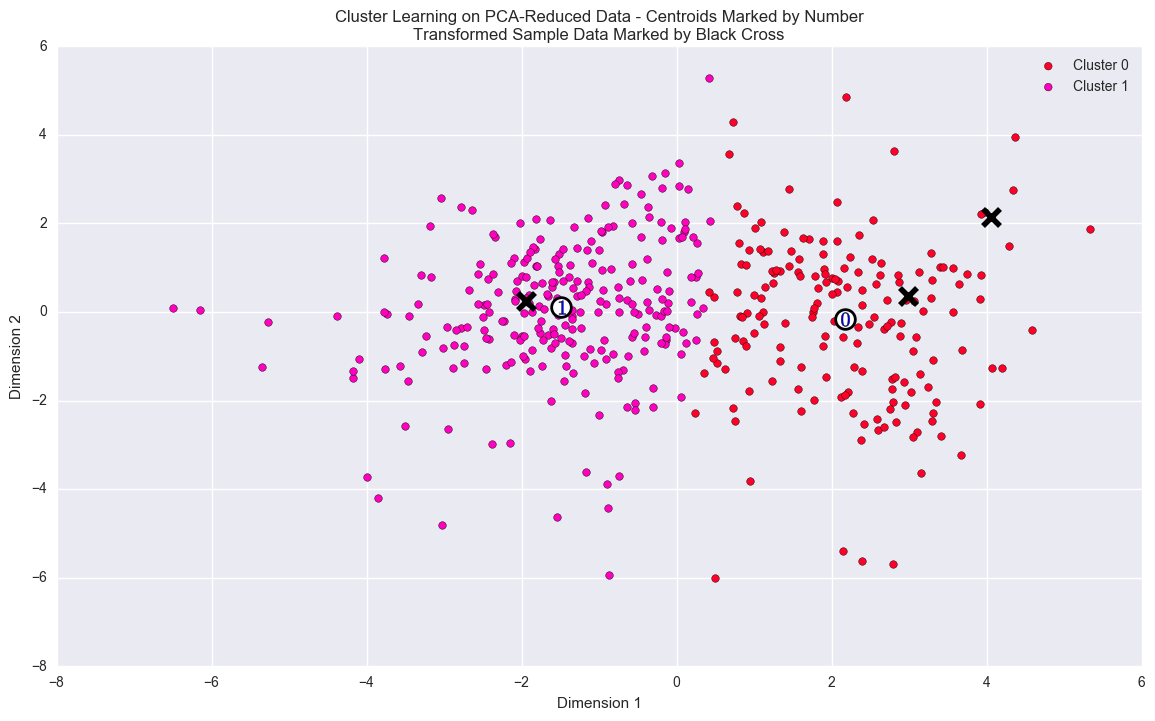

In [14]:
# based on reviewer it has chosen the solution based on best silhouette score which is cluster = 2, I will not personally 
# choose this solution as the underline structure is more complex than just 2 clusters and I still 
#beliver my previous selction of 6 clusters is better solution in real life


# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [15]:
# TODO: Inverse transform the centers

log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]

true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())

true_centers.index = segments

true_centers['total'] = true_centers.sum(axis=1)

display(true_centers)

#true_centers.plot(kind = 'bar', figsize = (10, 4))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0,30558.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0,16304.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

Here is the explanation if you only choose 2 clusters as suggested by reviewer (Please note this solution is not application in real life, but I am accomodating the reviewer comments)

if we condsider these 2 segments, (remember the total average spending from descriptive stat = 33226

Segment 0 represents the customer who spends far below than total average spending
Segment 1 represents the customer who spends neaerer to total average spending

Reviewer suggested to explain like "For Sample 0, the values for 'Grocery', 'Milk', and 'Detergents_Paper' are above average and match the Cluster 1 center in those categories. 'Delicatessen' is near average for both sample and the center of its predicted cluster, and 'Frozen' is below average"

In general from the delivery perspective there should be clear distintion on the  customer profile and one of the best way is to understand the toal spedning profile and behavious of each customer. For example frozen and short self life products need different delivery schedule and this condition also suggests that we can't simply have 2 groups, we should give priority to large enterprises and regular buyers and adjust the delivery schedule on tiered delivery model. A customer scoring model is another way to create a tierd model.

Here another application of unsupervised learning is that we can create perfect delivery schedule based on a product mix. This kind of application is very common in supply chain and logistics area.

______________________________________

Below if my explanation based on if you choose cluster = 6
If you follow my answer above I predicted before start of the problem that there is clear 6 groups.

I will repeat some parts here again, if we compare with the discriptive stats

If we like to dig down further on despriptive stat for field 'total' we can see 6 clear groups (G1, G2, G3, G4, G5 and G6). 
Please note (Q stands for quartile and G stands for groups), also remember that the average total spending of customers is 33226.

G1 ( for field 'total' Q 25% is 17448) --> Represent very low yearly total expenditure, probably small caffe or resturant spending less than total average.

G2 (for field 'total' Q 50% is 27492)  --> In between of Q 25% and Q 50% but still spending less than 'total' average

G3 (for field 'total' Q 75% is 41307) --> Represent high yearly expenditure, pobably big caffe chains, resutant chaines, retailers, markets, spending above average

G4 (for field 'total near minimum 904) --> Data points near the minimum, these are not year long consistent buyers it suggest they might be getting their stuff from others or they are really small buyers, this group must pay attention as this present the opportunity to grow business in this group.

G5 (for field 'total' near maximum 199891) ---> These data points indicates the biggest customers as well as biggest enterprises like big retailers chains.

G6 (for field 'total' near Mean 33226) --> The data points near the average and we can consider these as the year long medium buyer and also suggest medium size customers.


Roughly the examples shows
Segment 0 and 1 belongs to G3
Segment 2 belongs to G4
Segment 3 belongs to G1
Segemnt 4 and 5 belongs to G3

This gives ideas to imporve our model. It says very thin line between segment 0 & 1 ans also between 4 and 5


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [16]:
# Display the predictions
print sample_preds
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

[0 0 1]
Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


This is based on reviewer comments and while choosing cluster = 2

Sample point 0 and 1 belongs to cluster 1, represents the customer who spends neaerer to total average spending
Sample point 2 belongs to cluster 0, represents the customer who spends far below than total average spending

__________________________
Below if my explanation based on if you choose cluster = 6
As per our model sample points 0 and 1 belongs to cluster 0 and sample point 2 point belongs to cluster 5, 

previously I said (We have 6 groups G1, G2, G3, G4, G5 and G6)
0 represented in  group G5 maximum category and chances of biggest enterprises like big retailers chains or large resturant chain
1 represents in group G3 big caffe, retailer or resturant
2 represents in group G1, low expenditure, probably small caffe or resturant

It gives indication that cluster 0 represents the groups of big guys, means group of big enterprises and cluster 5 is group of small enterprises (In our graph above cluster 0 and 5 are on oppositie side)

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

A/B tests, as the name implies, two versions (A and B) are compared, which are identical except for one variation that might affect a user's behavior. Version A might be the currently used version (control), while version B is modified in some respect (treatment). A/B test is very much applied to the wholesale distributor in this case where it can be compared based on the 5 days (control) and 3 data (treatment) and the result can be used to measure the satisfaction of the customers.

Would such a change in the delivery service affect all customers equally?
Now as per our model it is clear that all customers are not equal and thats why they should not treated equally. We should use the help of clusters to define the levels of custers and built a clear cut service metrices.

How could the distributor identify who it affects the most?
Well A/B test is one good idea in conjuction with the clustering model. A/B test will give us the idea which customer are not satisfied. Then we can use this information with our model and futher enhance and get the customer profiles. Also note the big thing here is that we should run separate A / B tests on each group independently.

Intutively the customers who brings 80% of revenue should be treated different. A tiered delivery serive level model should be evolved based on results of this whole excerise.


### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

    Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available
I think one of the good predictor is the total expenditure by each customer, I have done a quick model in other attached python book. This is one feature I will suggest for  wholesale distributor to predict. Another feature from the data is the % of spend in each product against the total expenditure for individual customers. This might build better model.

    How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?
The clustering of data can be used in 2 ways
1) To solve the current issue with customer complaints: identfy the unsatisfied customer using A/B test, understand the clusters of customers, it will also give the profile of customers. Create a tierd delivery service model which should able to address the cluster variance and demand of customer belongs to different clusters.

2) Another way it can help from the long term perspective is the future identification of new customers into respective clusters, it can also predict real time the evoulution of current customers, if the buying pattern of the customer changes then algo can predict the cluster automatically and the service model to responds the changing needs.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

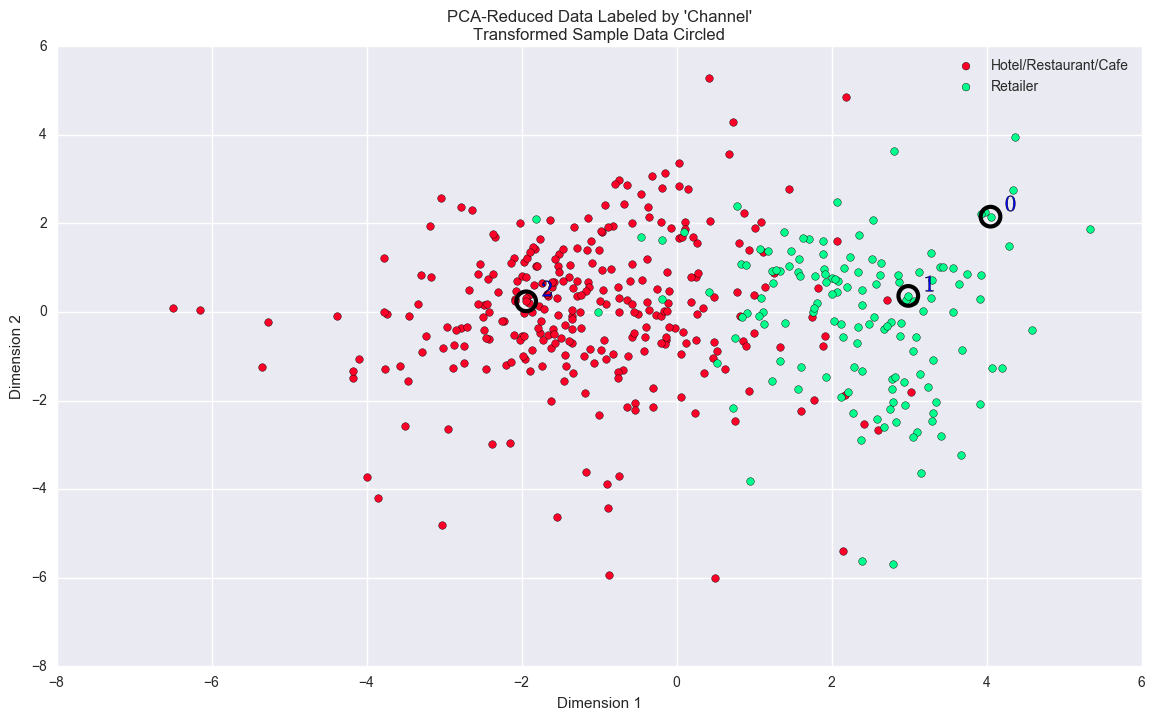

In [17]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

    How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?

As per the clusters in the algo and above comparision it doesn't match. In the graph above there is no clear pattern difference between HoReCa and Retailers. It is clear from our cluster model that it need more structure and these 2 catagories are not enough to define the underline pattern. As it is defined earlier HoReCa and Retailers can be small, medium and large enterprises, thats what our clustering model is predicting

    Would you consider these classifications as consistent with your previous definition of the customer segments?
These classifcation is not consistent with the customer segments i think this is the reason why distributer is facing problem, if you consider this classification you don't have much information it is just 2 categories HoReCa and Retailers and I think distributer made big mistake by considering everybody same and decided to change the protocal for delivery service and thats where the complaints starts.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.